In [159]:
#external imports
import numpy as np # for numerical calculation  
import pandas as pd # for data preprocessing and analysis 
import matplotlib.pyplot as plt # for visualization 
import seaborn as sns # for visualization 
from pandas.core.frame import DataFrame
from sklearn import preprocessing

sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision' , 2)


Load data set 

In [160]:
#load the dataset from the google drive
url_path = "https://drive.google.com/uc?id=1gg7yCMrhiAl58KXaRmtB1lj4rsicO7_f"

hr_org_dataset = pd.read_csv(url_path)

hr_org_dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [161]:
hr_org_dataset.shape

(2940, 35)

In [162]:
hr_org_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [163]:
hr_org_dataset.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,2466,2086,1922,1212,1764,652,1346,2940,2108


In [164]:
hr_org_dataset.describe(include='int')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.00,2940.00,2940.00,2940.00,2940.0,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.0,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00,2940.00
mean,36.92,802.49,9.19,2.91,1.0,1470.50,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.0,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.13,403.44,8.11,1.02,0.0,848.85,1.09,20.33,0.71,1.11,1.10,4707.16,7116.58,2.50,3.66,0.36,1.08,0.0,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.0,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.0,735.75,2.00,48.00,2.00,1.00,2.00,2911.00,8045.00,1.00,12.00,3.00,2.00,80.0,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.0,1470.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.0,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.0,2205.25,4.00,84.00,3.00,3.00,4.00,8380.00,20462.00,4.00,18.00,3.00,4.00,80.0,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.0,2940.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.0,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [165]:
#removed unwanted columns and unused features

unused_var = ['Over18', 'EmployeeCount', 'StandardHours' , 'PerformanceRating']

hr_org_dataset.drop(columns=unused_var, inplace=True)


In [166]:
hr_org_dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2


In [167]:
def find_missing_values(dataframe: DataFrame) -> DataFrame:
    total_missing: DataFrame = dataframe.isnull().sum()
    
    if total_missing.sum() == 0:
        return "There are no missing values in the DataFrame."
    
    percent_missing: DataFrame = (total_missing / len(dataframe)) * 100
    missing_values_df: DataFrame = pd.concat([total_missing, percent_missing], axis=1, keys=["Total", "Percentage"])
    missing_values_df = missing_values_df[missing_values_df["Total"] > 0]  # Filter out columns with no missing values
    
    return missing_values_df

In [168]:
find_missing_values(hr_org_dataset)

'There are no missing values in the DataFrame.'

In [169]:
def separate_categorical_numerical(dataframe: DataFrame) -> tuple:
    # Separate columns into categorical and numerical
    categorical_columns = list(dataframe.select_dtypes(include=['object', 'category']).columns)
    numerical_columns = list(dataframe.select_dtypes(exclude=['object', 'category']).columns)

    return categorical_columns, numerical_columns


In [170]:
cat_variables, num_variables = separate_categorical_numerical(hr_org_dataset)

In [171]:
cat_variables

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [172]:
num_variables

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# E D A

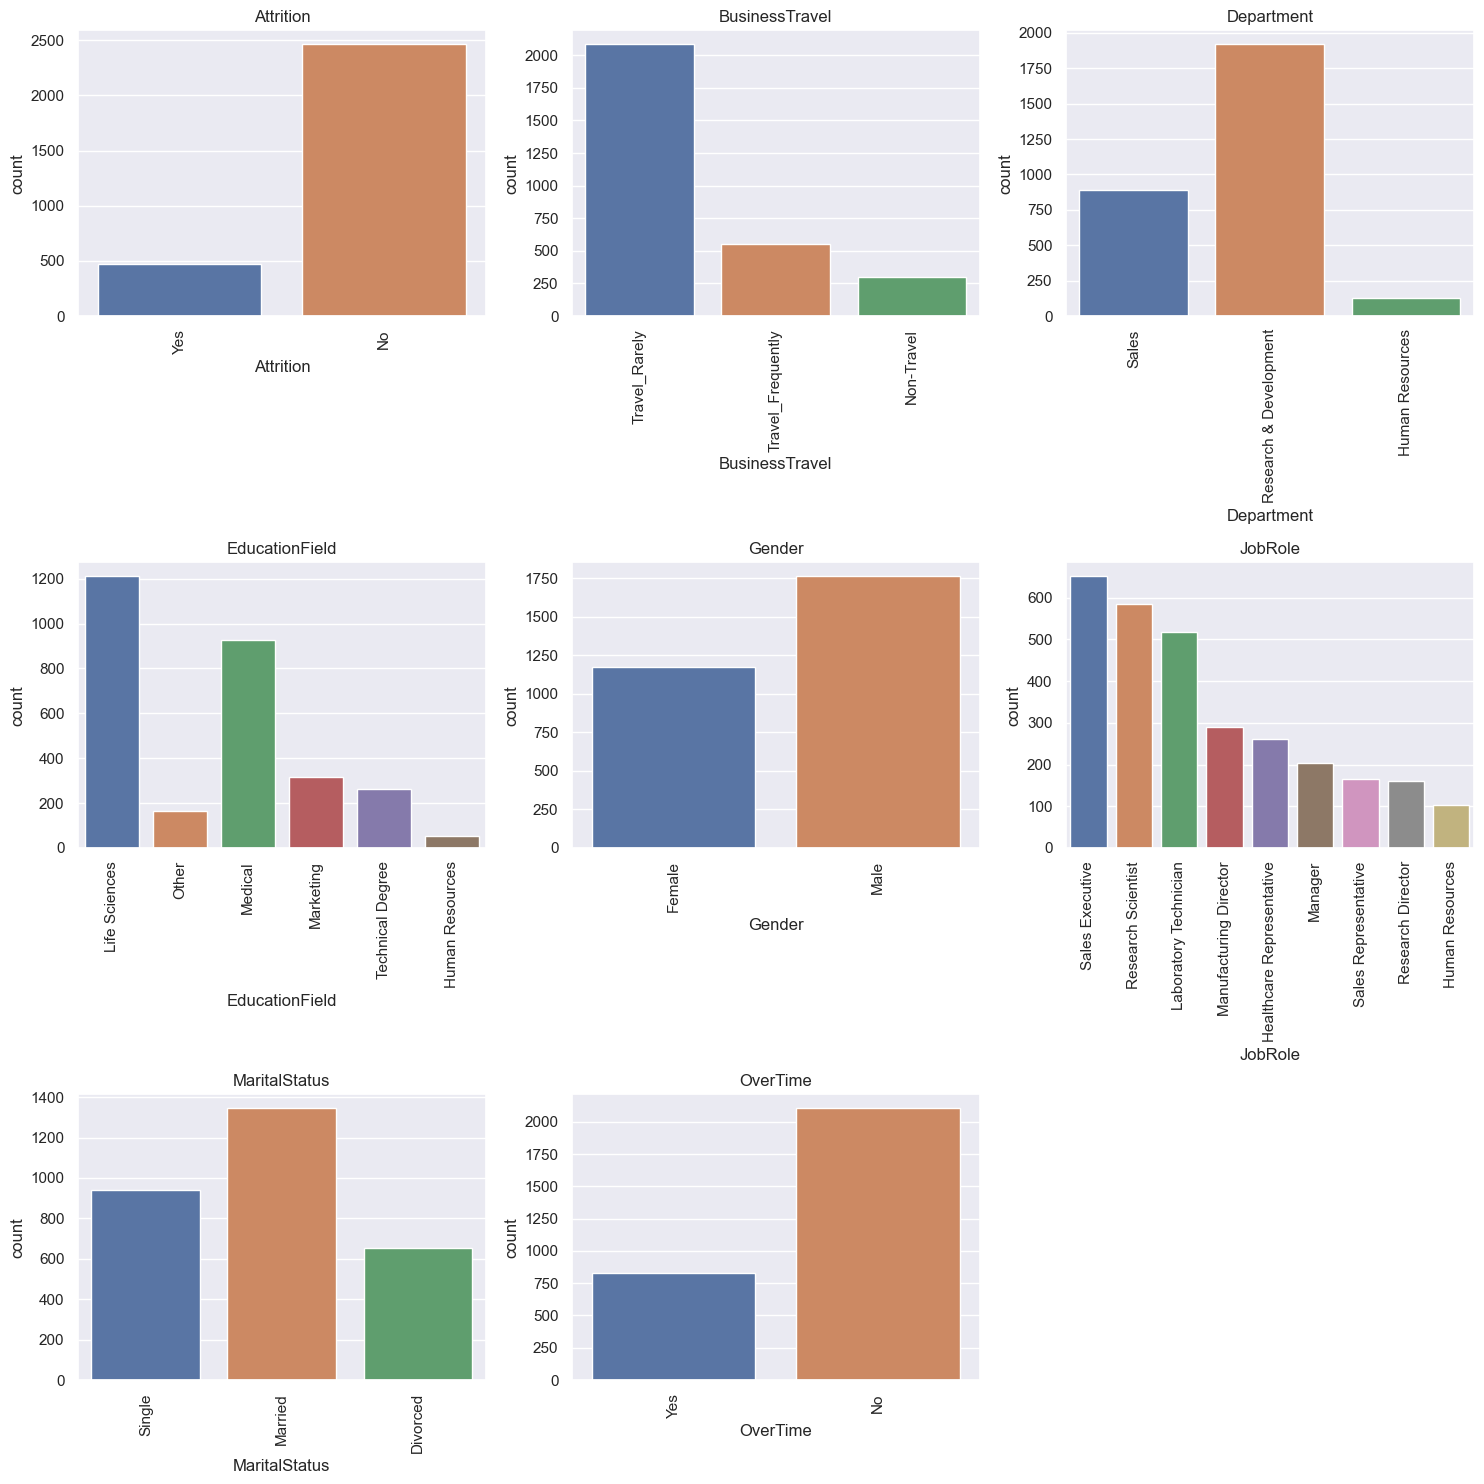

In [173]:
# Create a figure with subplots
num_cols = len(cat_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_variables):
    top_values = hr_org_dataset[var].value_counts().index
    filtered_df = hr_org_dataset[hr_org_dataset[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

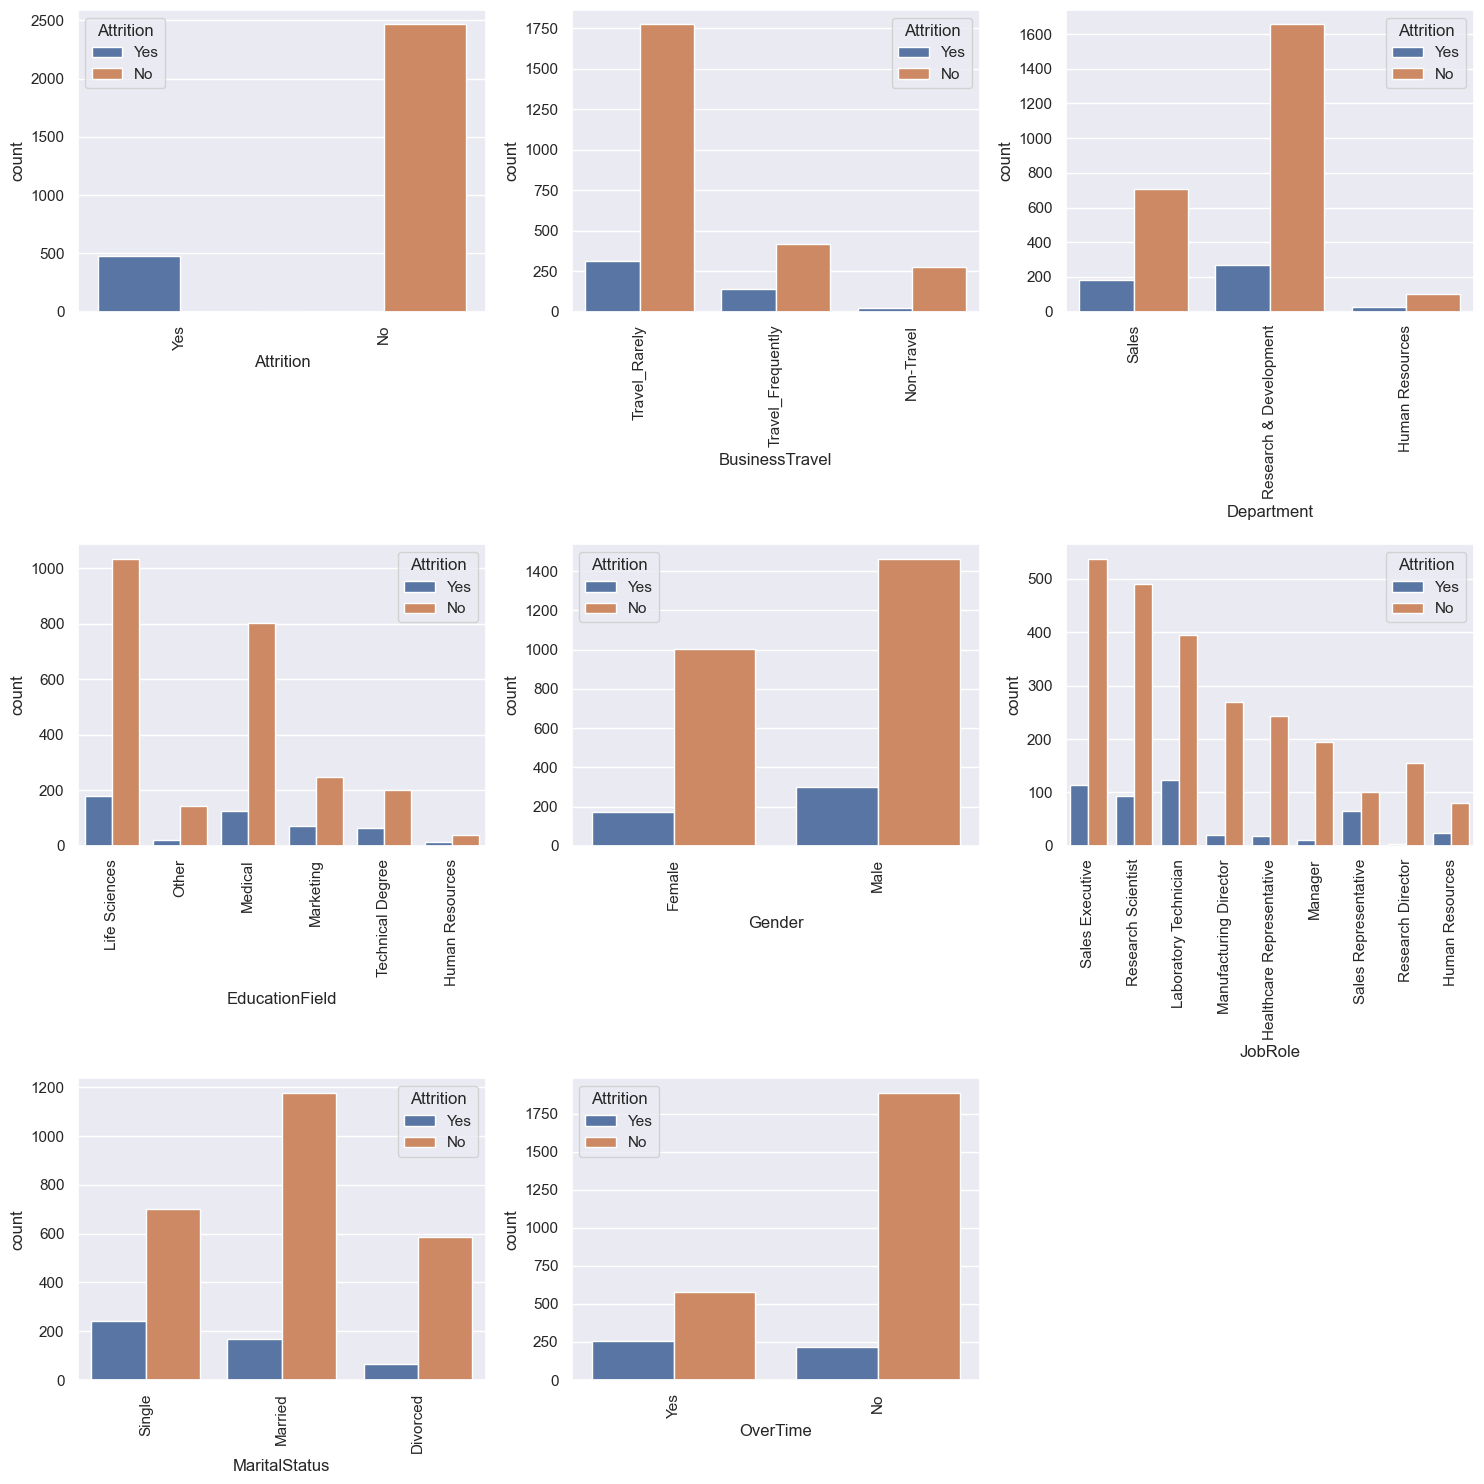

In [174]:


# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_variables)
num_rows = (num_cols + 2) // 3 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_variables):
    filtered_df = hr_org_dataset[hr_org_dataset[var].notnull()]  
    sns.countplot(x=var, hue='Attrition', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### categorical Distribution plots

C:\Users\samee\AppData\Local\Temp\ipykernel_13828\173018631.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\samee\AppData\Local\Temp\ipykernel_13828\173018631.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


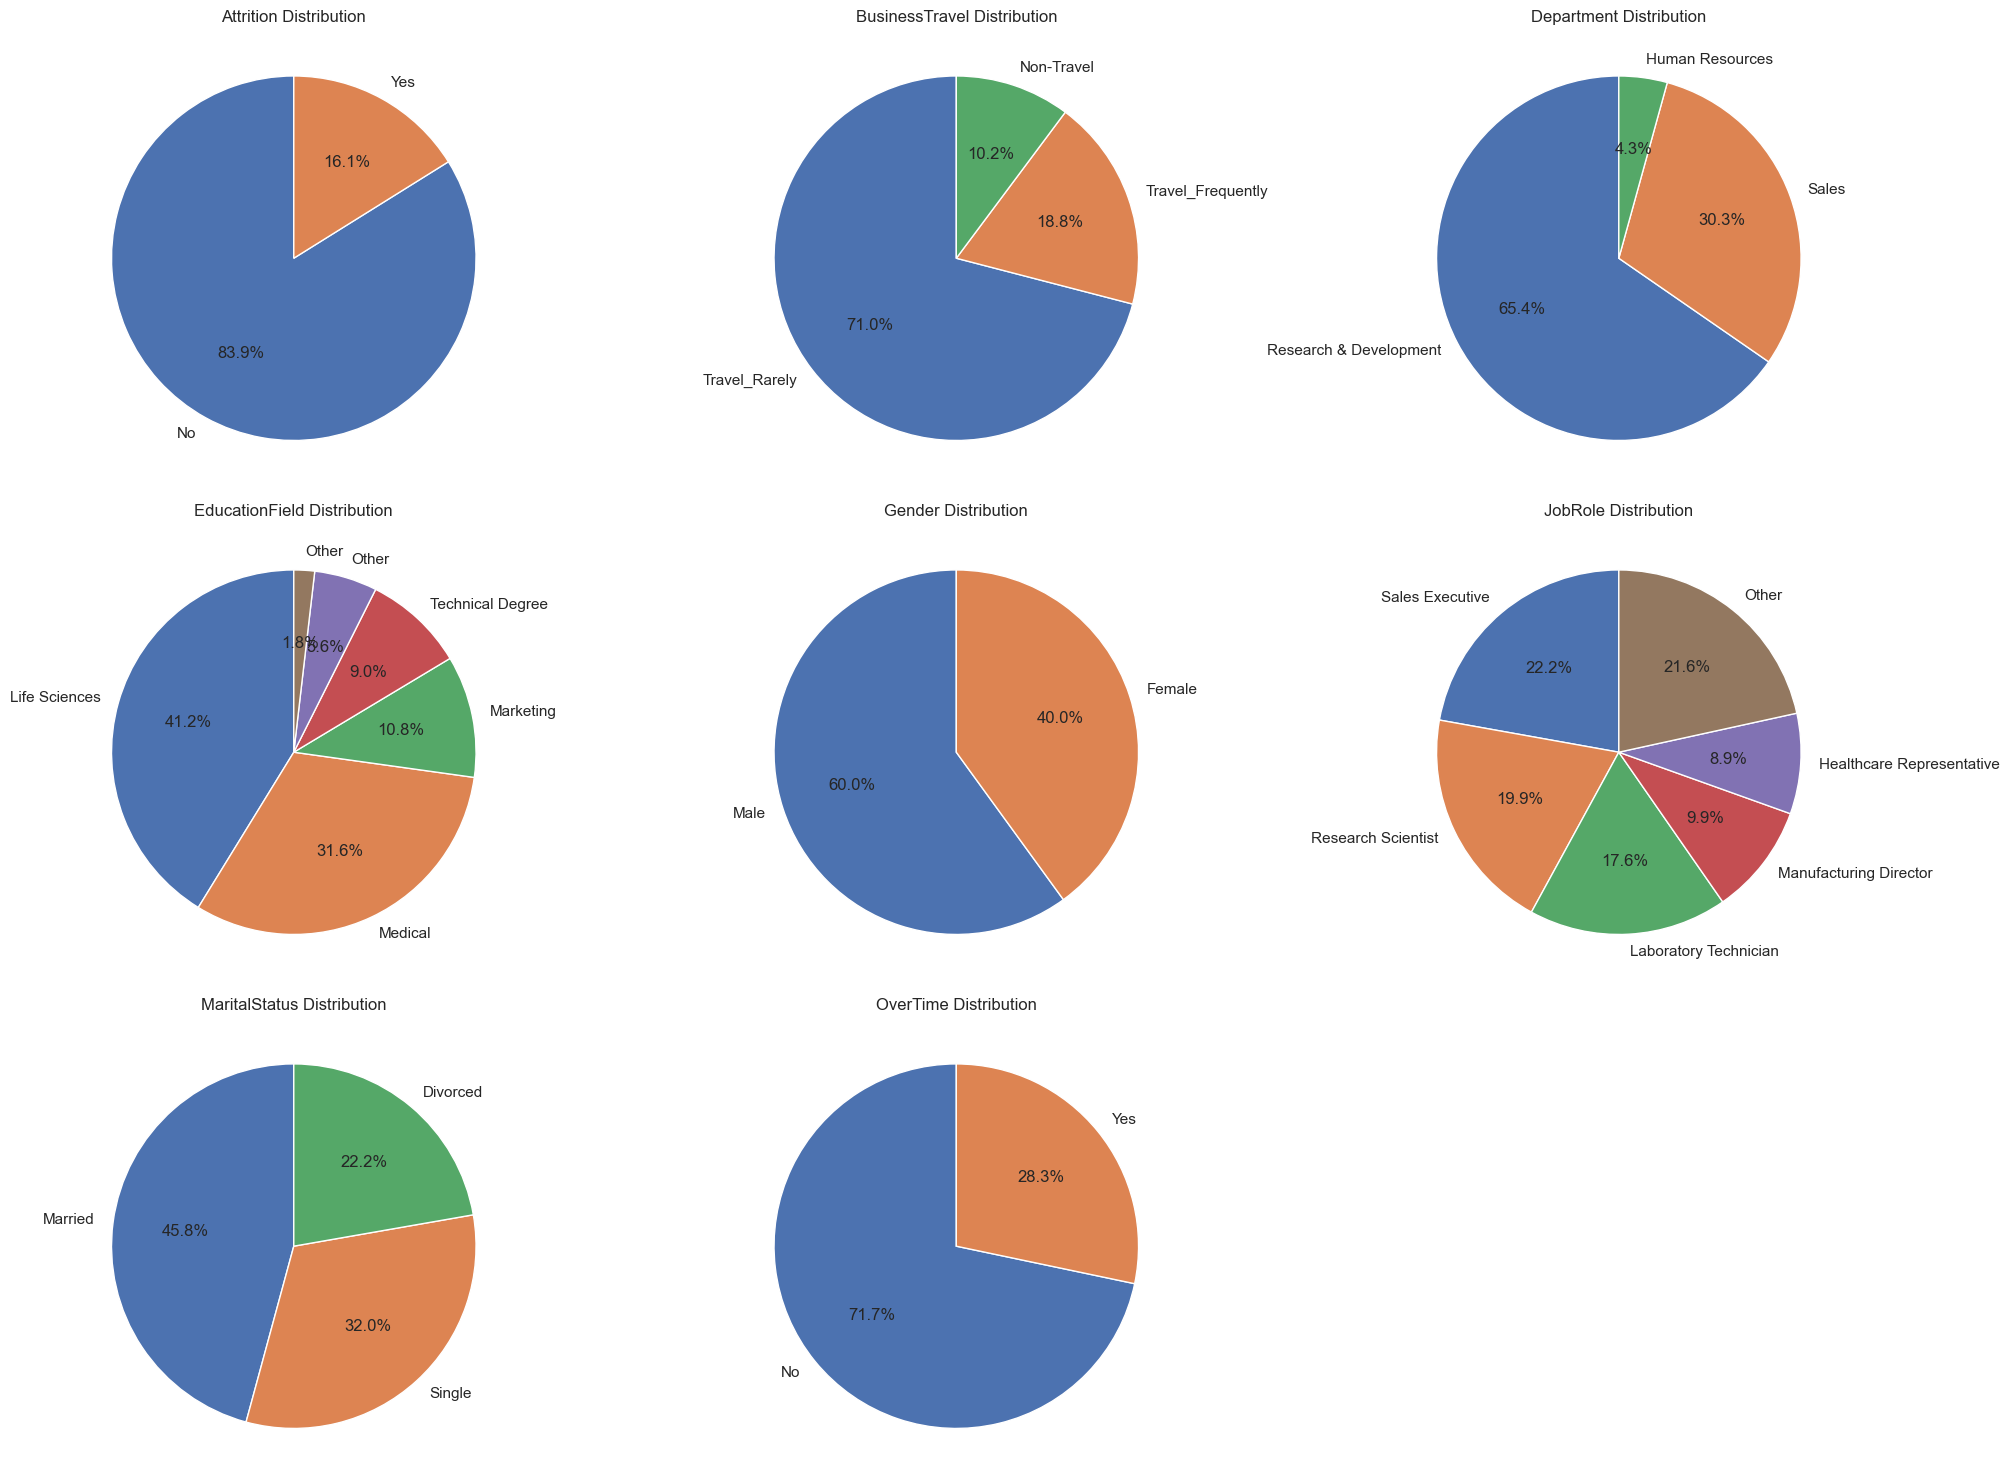

In [175]:
import warnings
max_categories = 5

# Create a figure with subplots
num_cols = len(cat_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_variables):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = hr_org_dataset[col].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

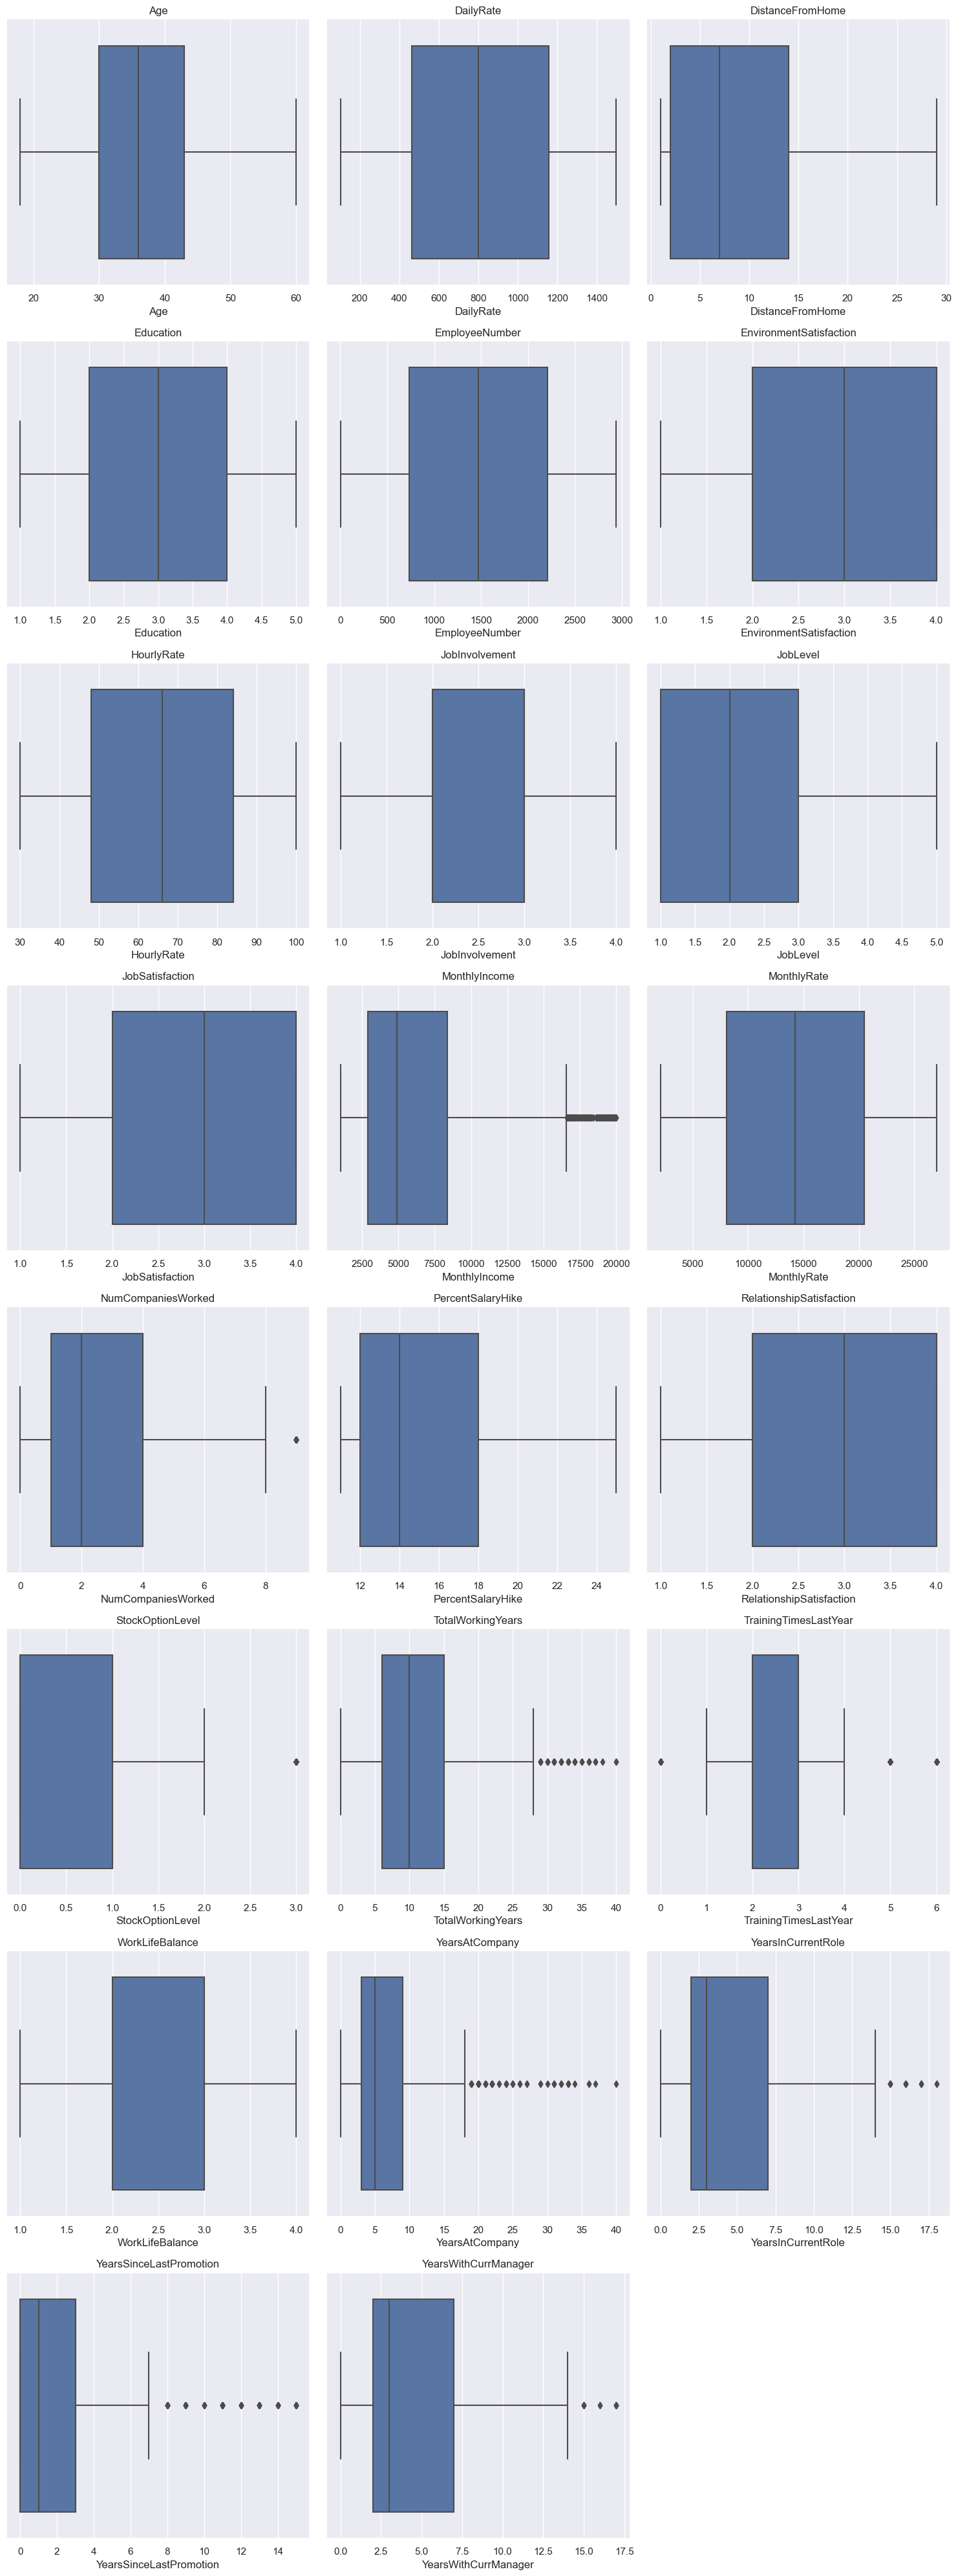

In [176]:
# Create a figure with subplots
num_cols = len(num_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_variables):
    sns.boxplot(x=hr_org_dataset[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

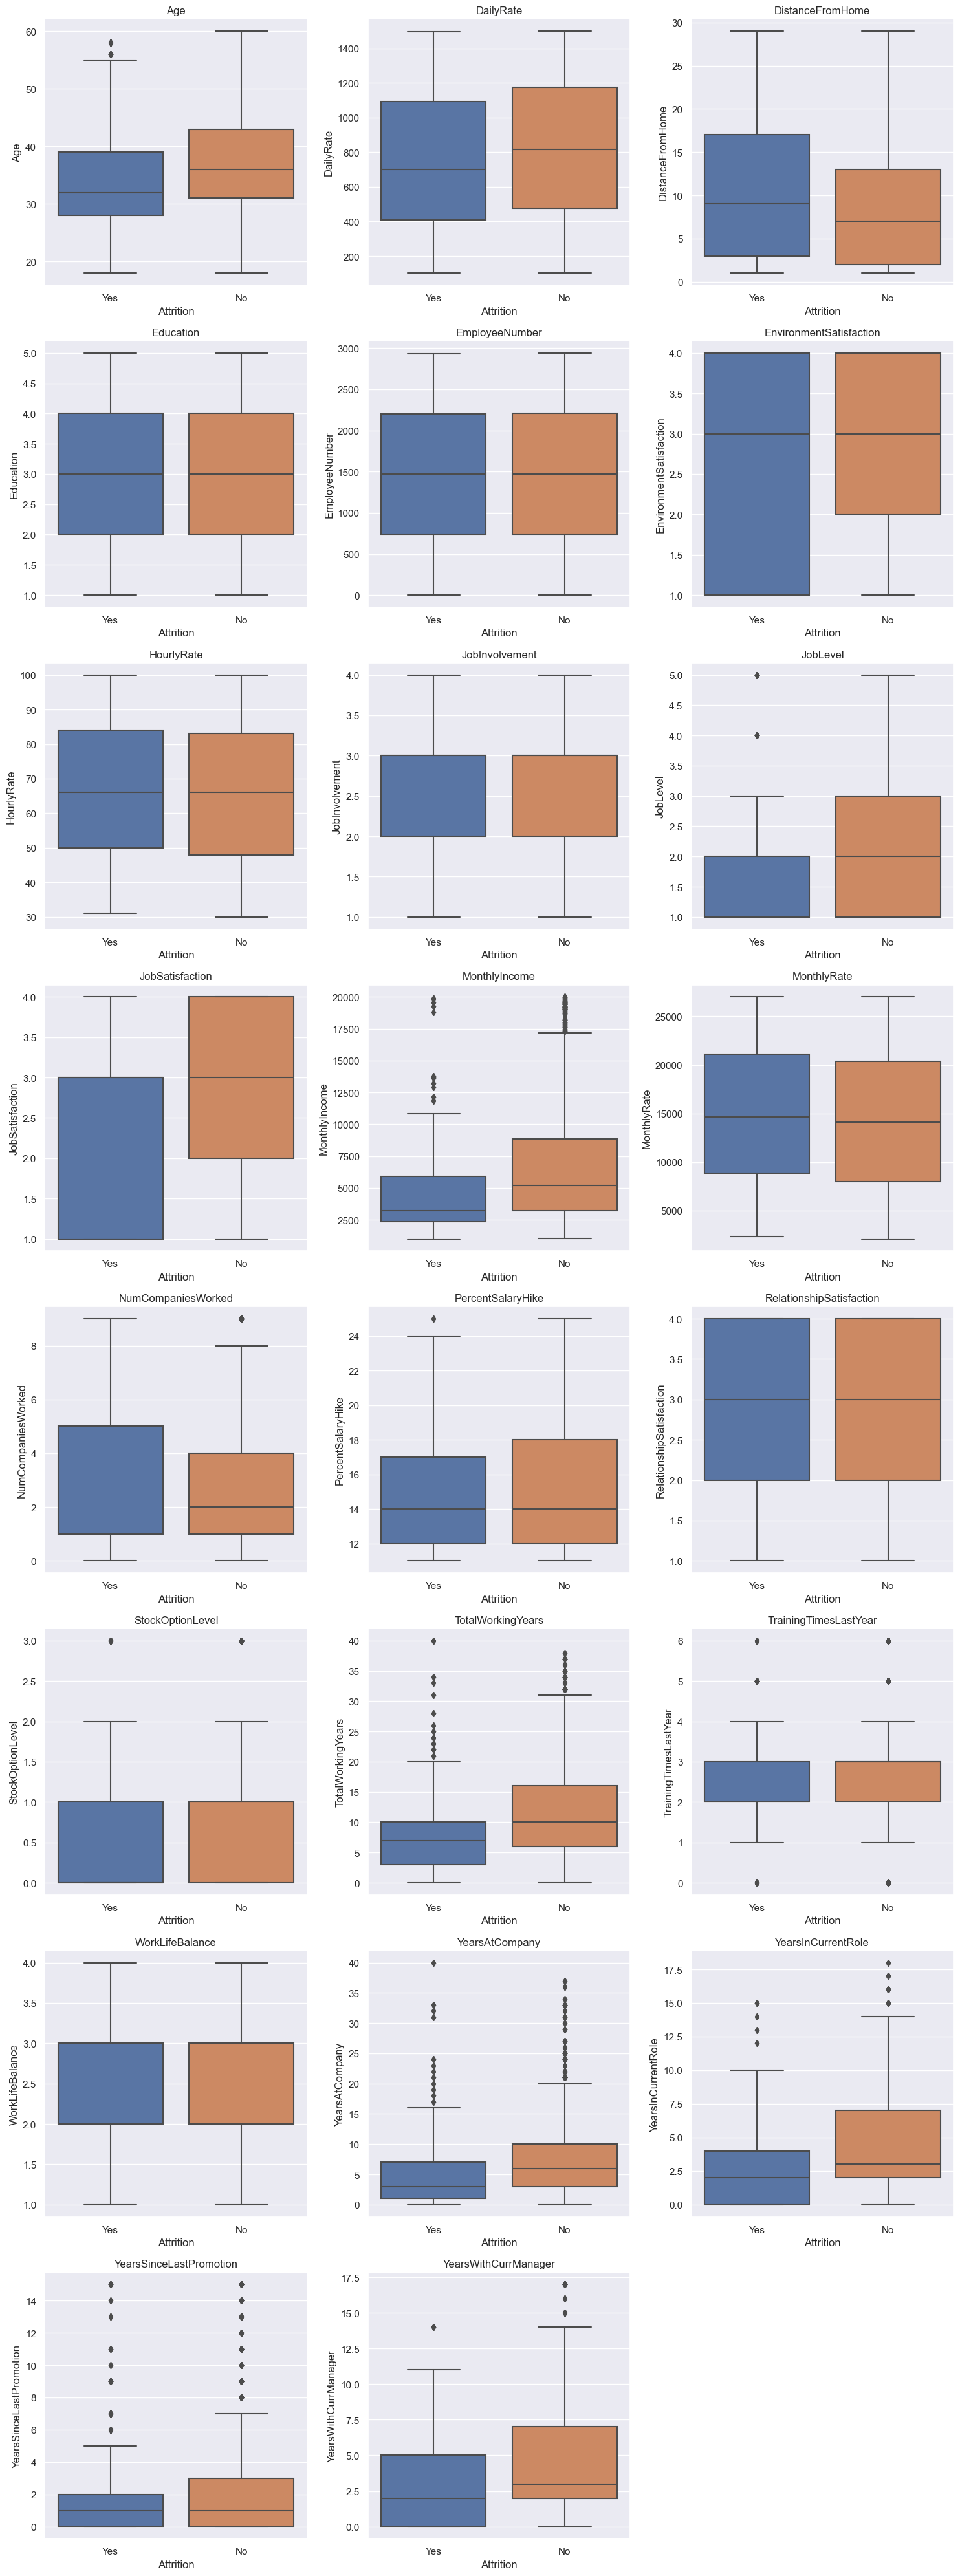

In [177]:
# Create a figure with subplots
num_cols = len(num_variables)
num_rows = (num_cols + 2) // 3  
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(num_variables):
    sns.boxplot(y=var, x='Attrition', data=hr_org_dataset, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [178]:
def replace_outliers_with_median(datafarme, factor=1.5):
   
    for column in datafarme.columns:
        if datafarme[column].dtype != 'object':  # Exclude non-numeric columns
            q1 = datafarme[column].quantile(0.25)
            q3 = datafarme[column].quantile(0.75)
            iqr = q3 - q1
            lower_limit = q1 - factor * iqr
            upper_limit = q3 + factor * iqr
            datafarme[column] = datafarme[column].clip(lower_limit, upper_limit)
    return datafarme

In [179]:
hr_org_dataset = replace_outliers_with_median(hr_org_dataset)

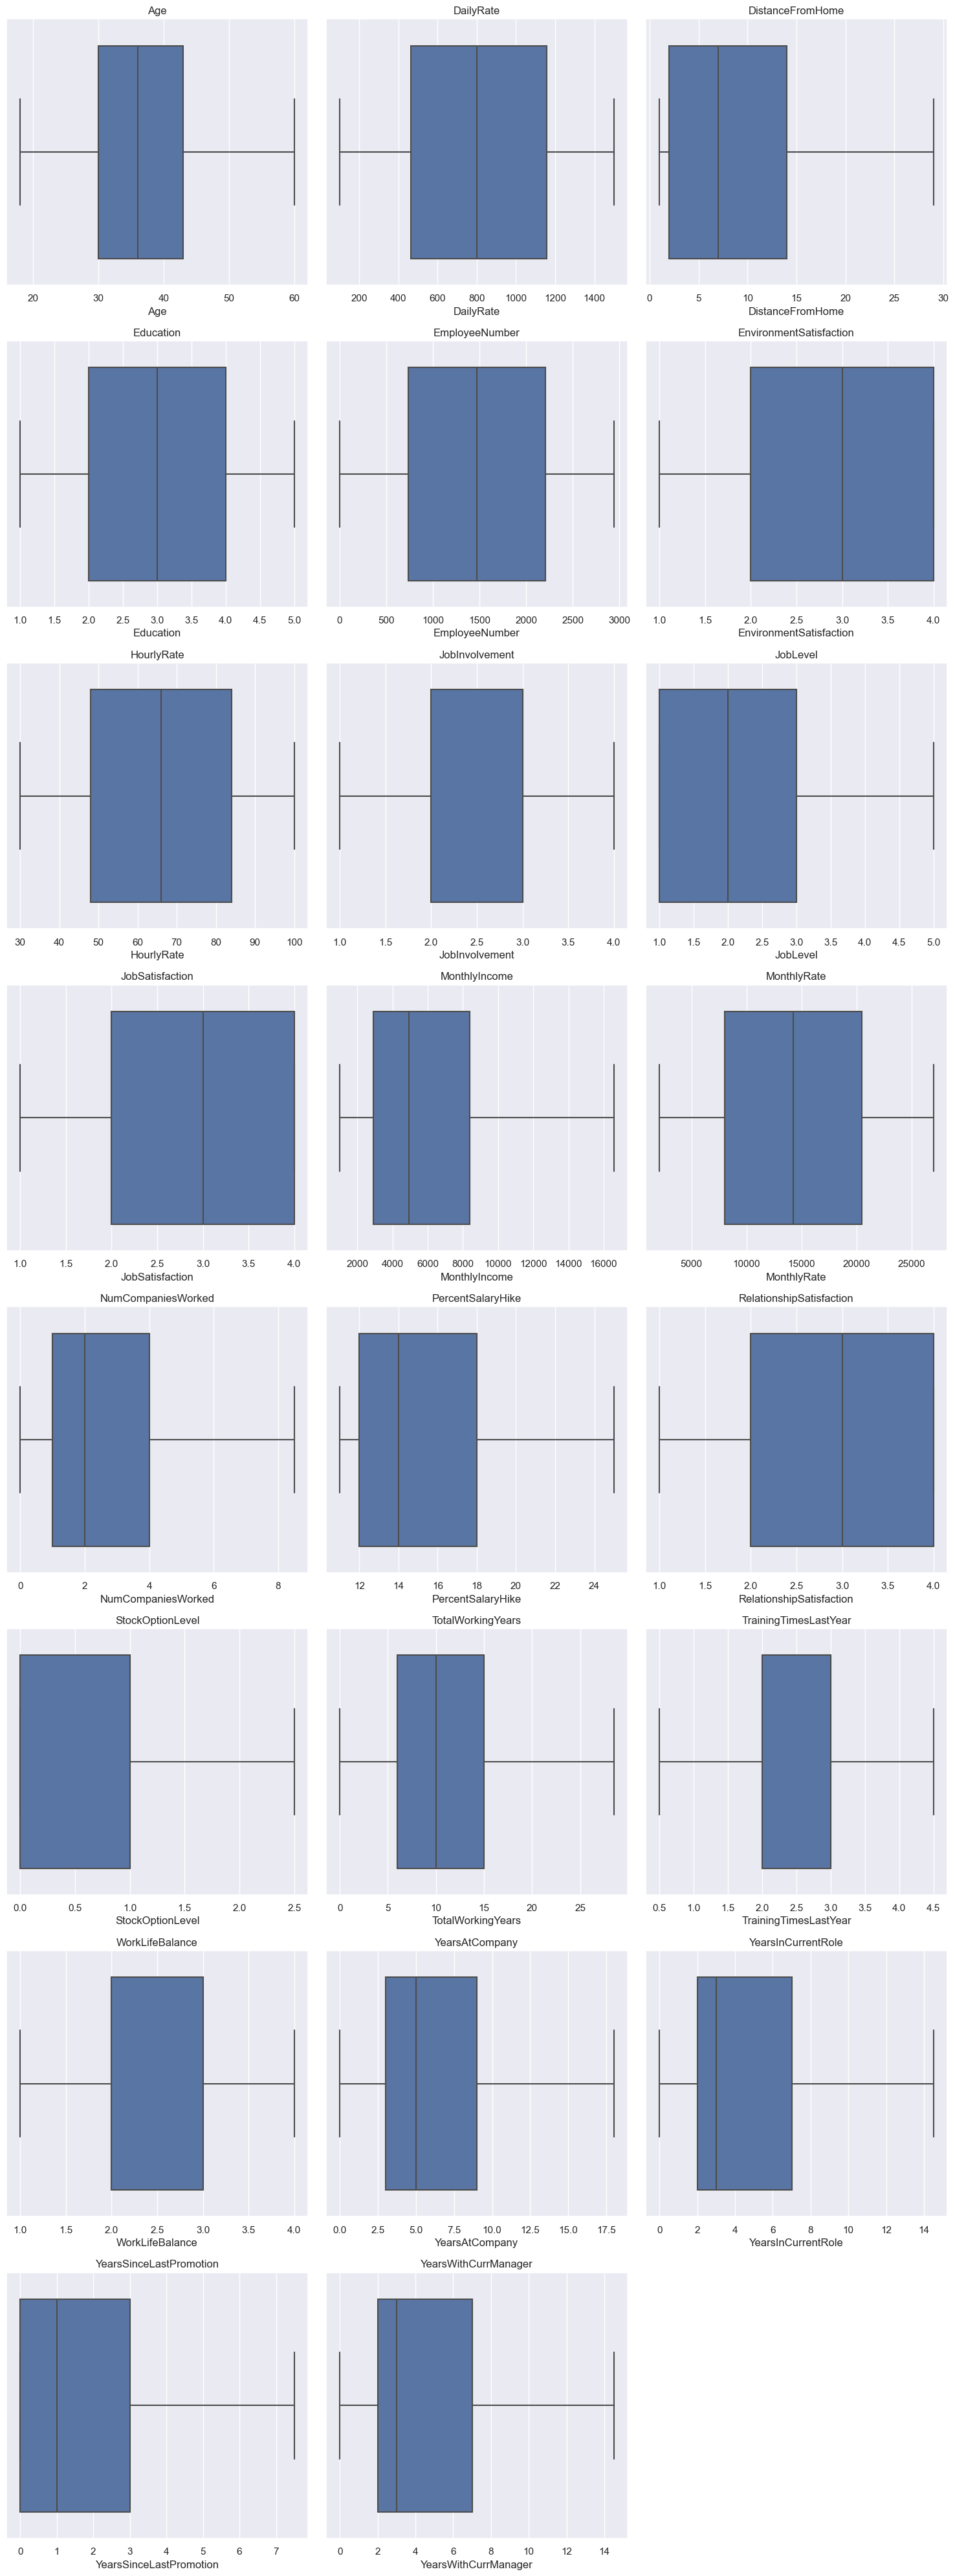

In [180]:
# Create a figure with subplots
num_cols = len(num_variables)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_variables):
    sns.boxplot(x=hr_org_dataset[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

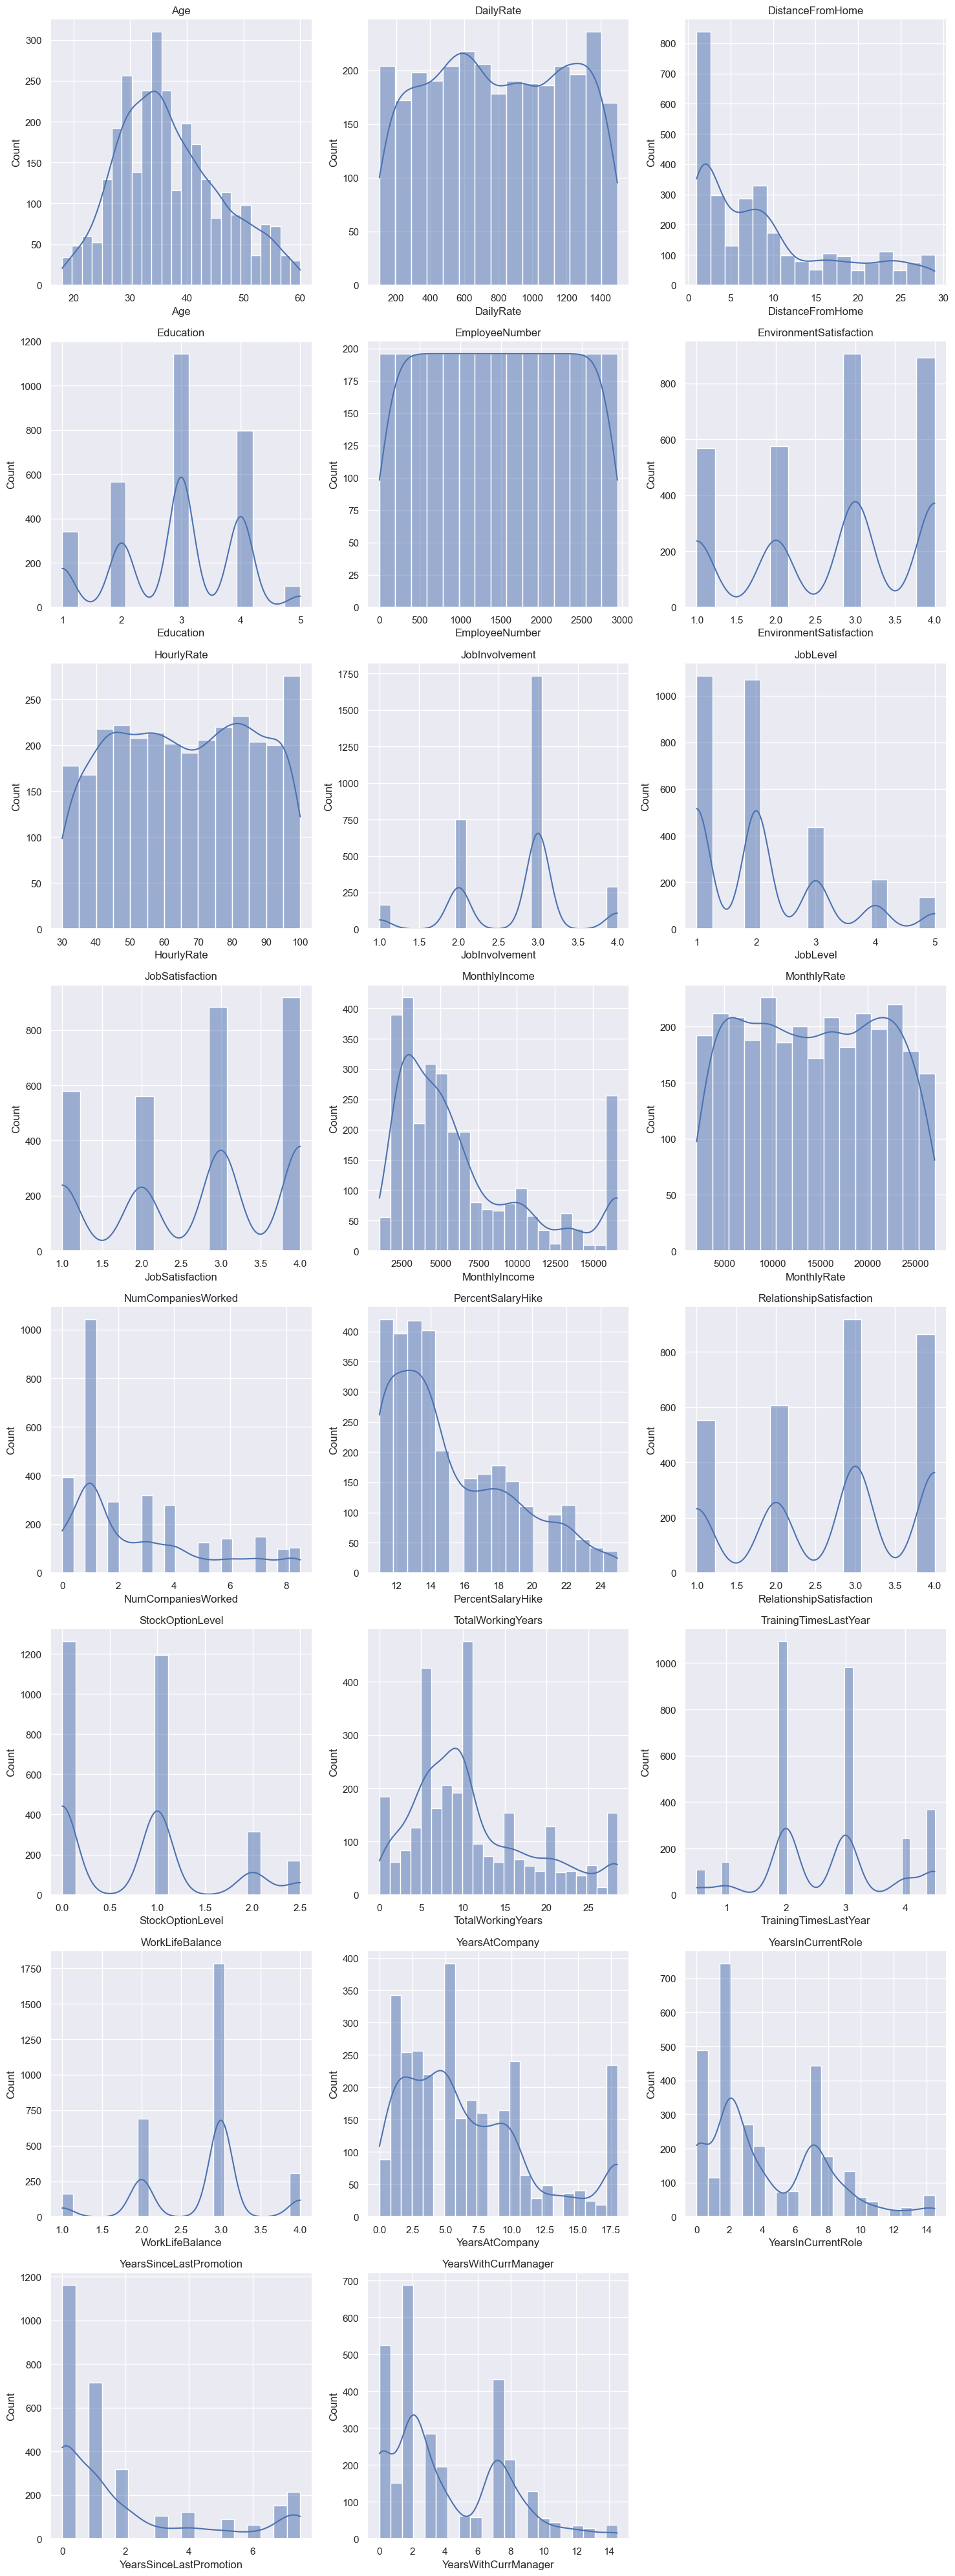

In [181]:
# Create a figure with subplots
num_cols = len(num_variables)
num_rows = (num_cols + 2) // 3 
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable using sns.histplot
for i, var in enumerate(num_variables):
    sns.histplot(data=hr_org_dataset, x=var, ax=axs[i], kde=True)  # Use sns.histplot for histograms with KDE
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [182]:
def onehot_encode_categorical_variables(df, categorical_columns):
    """
    One-hot encodes specified categorical columns in a DataFrame using scikit-learn's OneHotEncoder.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - categorical_columns: list
        A list of column names to be one-hot encoded.

    Returns:
    - DataFrame
        A DataFrame with the specified columns one-hot encoded.
    """
    encoder = preprocessing.OneHotEncoder(sparse_output=False)
    encoded_features = encoder.fit_transform(df[categorical_columns])
    
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    
    df.drop(categorical_columns, axis=1, inplace=True)
    
    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    df_encoded = pd.concat([df, encoded_df], axis=1)
    
    return df_encoded

In [183]:
def label_encode_categorical_variables(dataframe: DataFrame, categorical_columns: list) -> DataFrame:
    """
    Label encode categorical variables in a DataFrame.

    Parameters:
    - dataframe: DataFrame
        The input DataFrame.
    - categorical_columns: list
        A list of column names that contain categorical variables to be label encoded.

    Returns:
    - DataFrame
        A new DataFrame with categorical variables label encoded.
    """
    
    label_encoder = preprocessing.LabelEncoder()

    for column in categorical_columns:
        if column in dataframe.columns:
            dataframe[column] = label_encoder.fit_transform(dataframe[column])
            print(f"{column}: {dataframe[column].unique()}")

    return dataframe

In [184]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in cat_variables:
    # Print the column name and the unique values
    print(f"{col}: {hr_org_dataset[col].unique()}")

Attrition: ['Yes' 'No']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender: ['Female' 'Male']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus: ['Single' 'Married' 'Divorced']
OverTime: ['Yes' 'No']


In [185]:
colums_oneHot_encoding= ['BusinessTravel' , "Department", 'EducationField' , 'JobRole' , 'MaritalStatus']

onehoted_df = onehot_encode_categorical_variables(hr_org_dataset ,colums_oneHot_encoding )

In [186]:
onehoted_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,1102,1,2,1,2,Female,94,3,2,4,5993.0,19479,8.0,Yes,11,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,No,279,8,1,2,3,Male,61,2,2,2,5130.0,24907,1.0,No,23,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,Yes,1373,2,2,3,4,Male,92,2,1,3,2090.0,2396,6.0,Yes,15,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,No,1392,3,4,4,4,Female,56,3,1,3,2909.0,23159,1.0,Yes,11,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,No,591,2,1,5,1,Male,40,3,1,2,3468.0,16632,8.5,No,12,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,884,23,2,2936,3,Male,41,4,2,4,2571.0,12290,4.0,No,17,3,1.0,17.0,3.0,3,5,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2936,39,No,613,6,1,2937,4,Male,42,2,3,1,9991.0,21457,4.0,No,15,1,1.0,9.0,4.5,3,7,7.0,1.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2937,27,No,155,4,3,2938,2,Male,87,4,2,2,6142.0,5174,1.0,Yes,20,2,1.0,6.0,0.5,3,6,2.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2938,49,No,1023,2,3,2939,4,Male,63,2,2,2,5390.0,13243,2.0,No,14,4,0.0,17.0,3.0,2,9,6.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [187]:
onehoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2940 non-null   int64  
 1   Attrition                          2940 non-null   object 
 2   DailyRate                          2940 non-null   int64  
 3   DistanceFromHome                   2940 non-null   int64  
 4   Education                          2940 non-null   int64  
 5   EmployeeNumber                     2940 non-null   int64  
 6   EnvironmentSatisfaction            2940 non-null   int64  
 7   Gender                             2940 non-null   object 
 8   HourlyRate                         2940 non-null   int64  
 9   JobInvolvement                     2940 non-null   int64  
 10  JobLevel                           2940 non-null   int64  
 11  JobSatisfaction                    2940 non-null   int64

In [188]:
colums_label_encoding = ['OverTime','Attrition' ,'Gender' ]
final_dataframe_to_train = label_encode_categorical_variables(onehoted_df, colums_label_encoding)
final_dataframe_to_train

OverTime: [1 0]
Attrition: [1 0]
Gender: [0 1]


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,2,4,5993.0,19479,8.0,1,11,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,2,3,1,61,2,2,2,5130.0,24907,1.0,0,23,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,3,4,1,92,2,1,3,2090.0,2396,6.0,1,15,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,4,0,56,3,1,3,2909.0,23159,1.0,1,11,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,5,1,1,40,3,1,2,3468.0,16632,8.5,0,12,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,884,23,2,2936,3,1,41,4,2,4,2571.0,12290,4.0,0,17,3,1.0,17.0,3.0,3,5,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2936,39,0,613,6,1,2937,4,1,42,2,3,1,9991.0,21457,4.0,0,15,1,1.0,9.0,4.5,3,7,7.0,1.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2937,27,0,155,4,3,2938,2,1,87,4,2,2,6142.0,5174,1.0,1,20,2,1.0,6.0,0.5,3,6,2.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2938,49,0,1023,2,3,2939,4,1,63,2,2,2,5390.0,13243,2.0,0,14,4,0.0,17.0,3.0,2,9,6.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [189]:
def plot_high_correlation(dataframe, threshold=0.7):
    """
    Plot a correlation heatmap showing correlations above a specified threshold.

    Parameters:
    - dataframe: DataFrame
        The input DataFrame containing numerical variables.
    - threshold: float (default: 0.7)
        The correlation threshold above which correlations are displayed in the heatmap.

    Returns:
    - None
        The function displays the correlation heatmap.
    """
    
    corr_matrix = dataframe.corr()

    mask = corr_matrix.abs() < threshold

    plt.figure(figsize=(30, 22))

    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="GnBu", mask=mask,  vmin=0.7, vmax=1)
    

    plt.title('Correaltion Martix')

    plt.show()

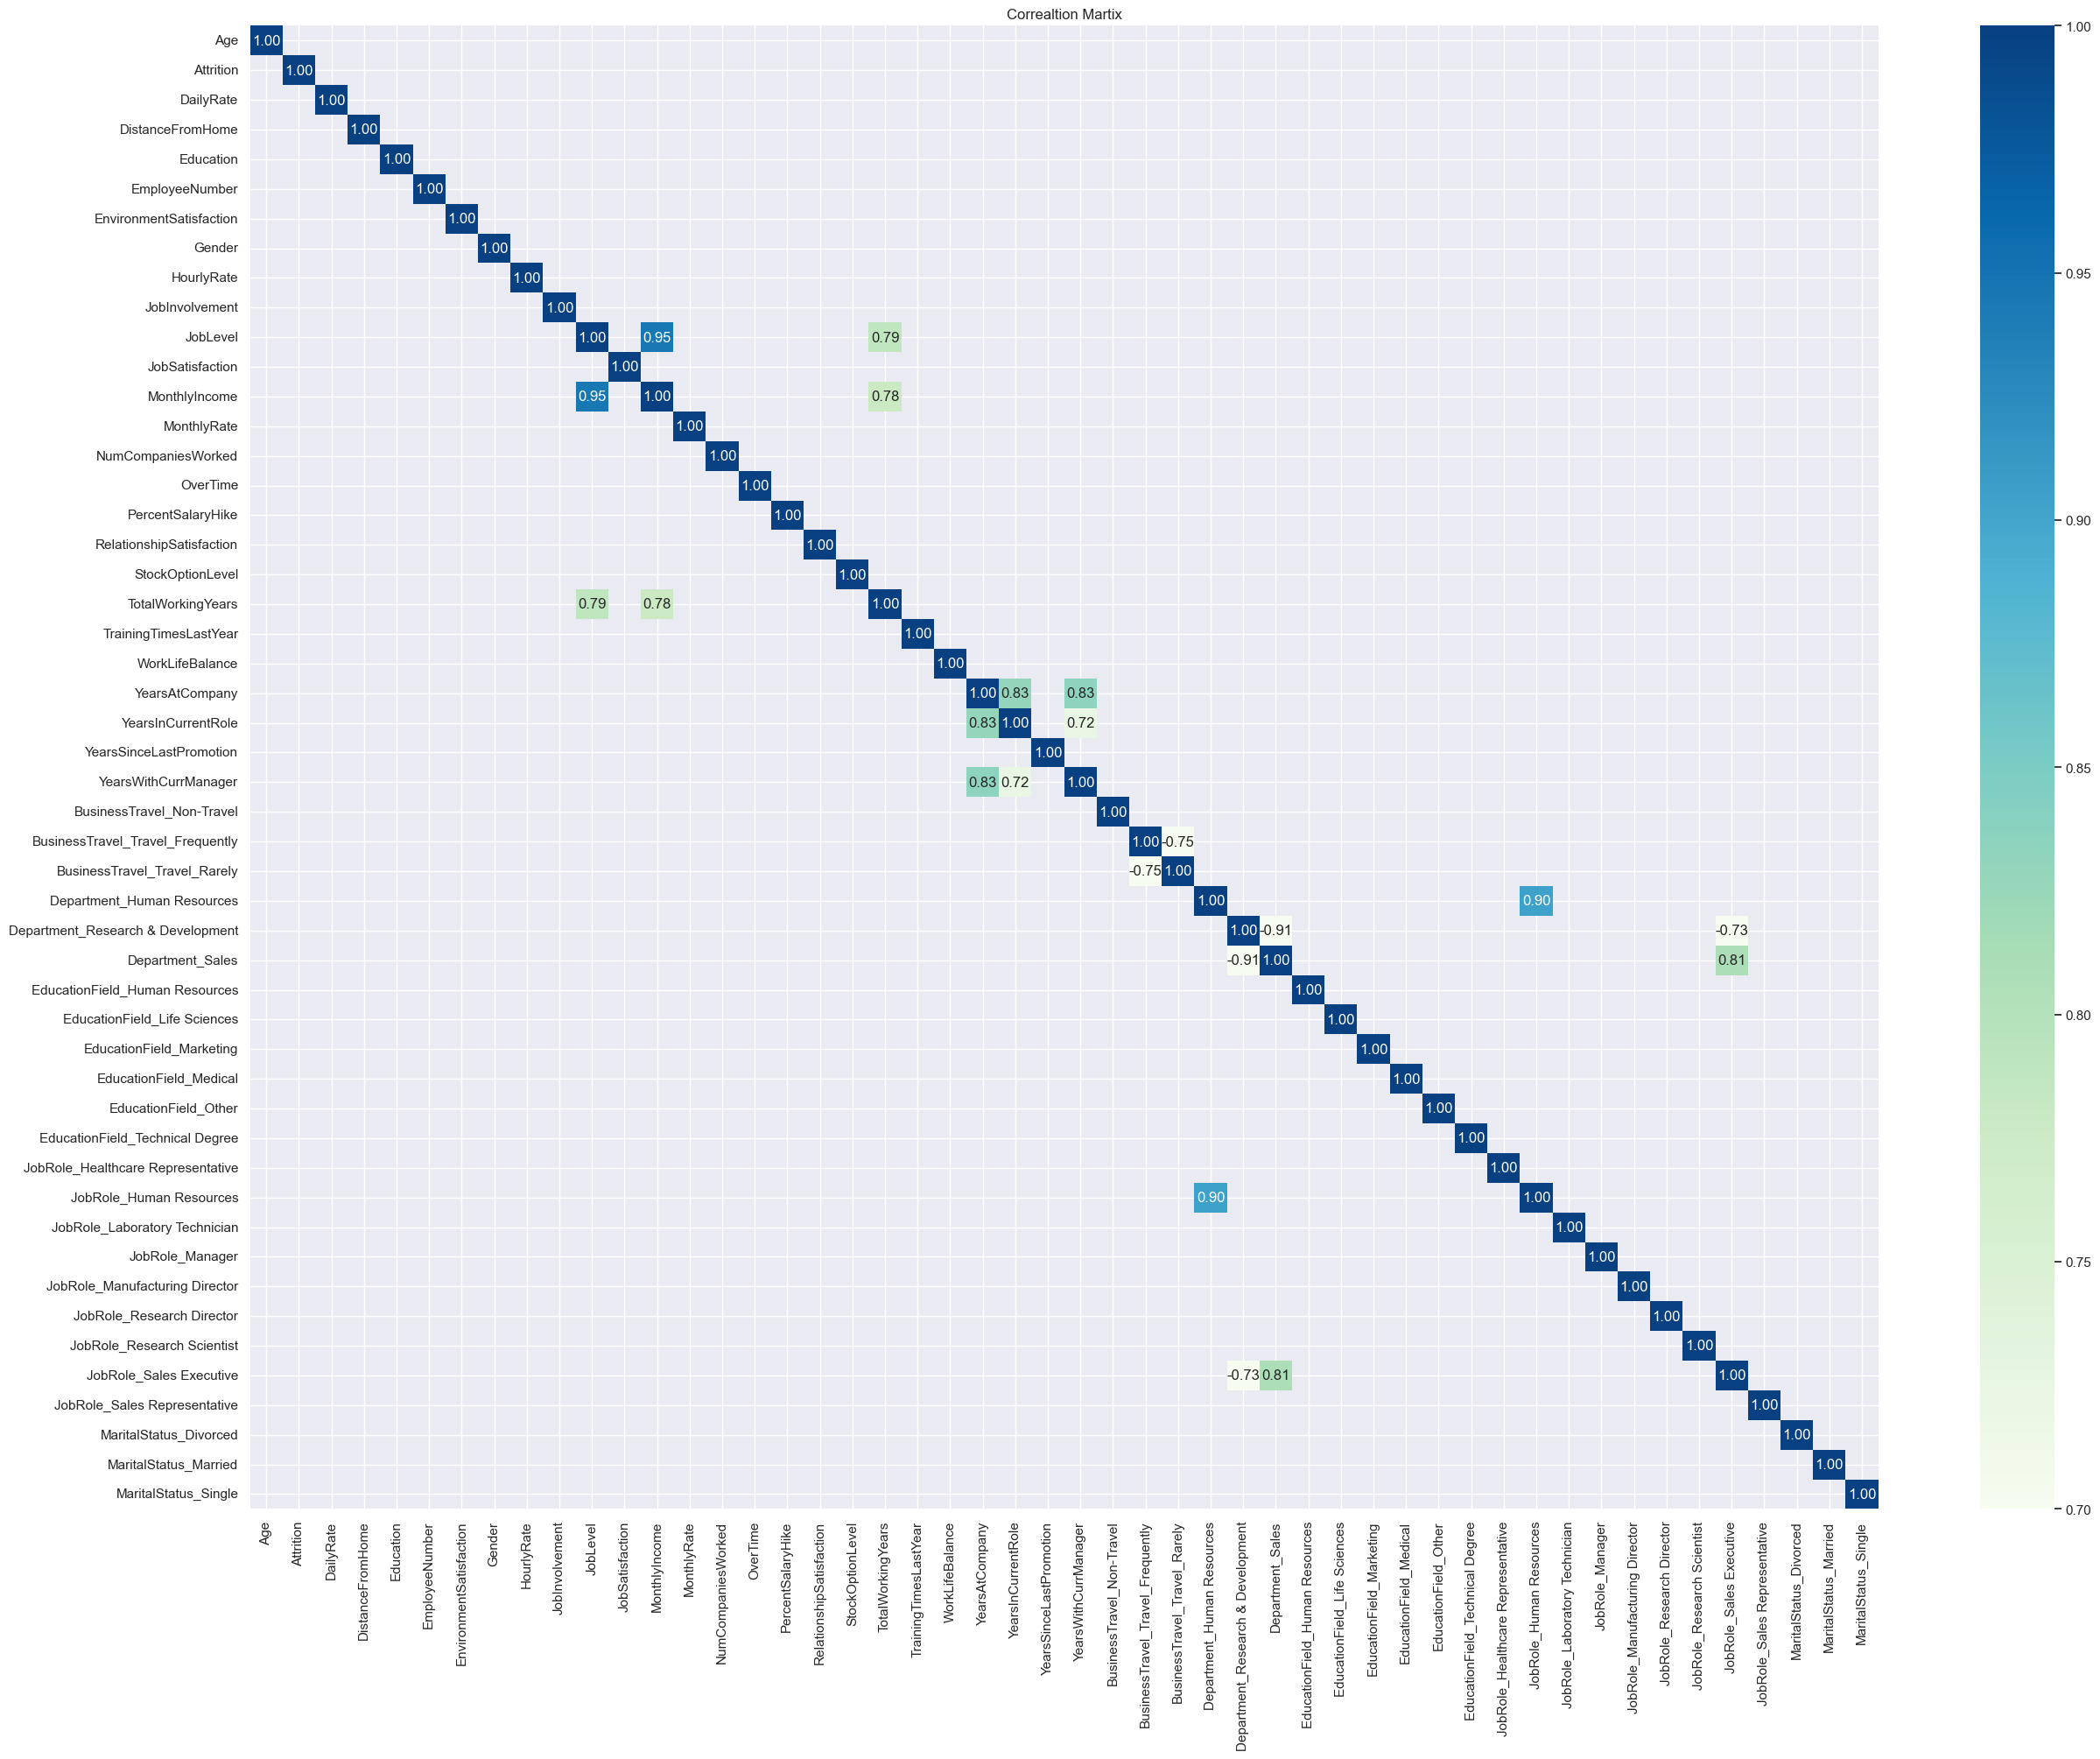

In [190]:
plot_high_correlation(final_dataframe_to_train , threshold=0.7)

In [191]:
def drop_highly_correlated_variables(dataframe: DataFrame, threshold: float = 0.7) -> DataFrame:
    """
    Drop highly correlated variables from a DataFrame based on a specified threshold.

    Parameters:
    - dataframe: DataFrame
        The input DataFrame containing numerical variables.
    - threshold: float (default: 0.7)
        The correlation threshold above which variables are considered highly correlated and dropped.

    Returns:
    - DataFrame
        A new DataFrame with highly correlated variables removed.
    """
  
    corr_matrix = dataframe.corr().abs()

    mask = corr_matrix >= threshold

    high_corr_vars = set()
    for col in mask.columns:
        correlated_columns = mask.columns[mask[col]]
        for col2 in correlated_columns:
            if col != col2:
                high_corr_vars.add(col2)

    # Drop highly correlated variables
    reduced_dataframe = dataframe.drop(columns=high_corr_vars)
    
    return reduced_dataframe

In [192]:
correlated_dataframe = drop_highly_correlated_variables(final_dataframe_to_train)

In [193]:
correlated_dataframe

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,BusinessTravel_Non-Travel,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,4,19479,8.0,1,11,1,0.0,0.5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,2,3,1,61,2,2,24907,1.0,0,23,4,1.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,3,4,1,92,2,3,2396,6.0,1,15,2,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,4,0,56,3,3,23159,1.0,1,11,3,0.0,3.0,3,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,5,1,1,40,3,2,16632,8.5,0,12,4,1.0,3.0,3,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,0,884,23,2,2936,3,1,41,4,4,12290,4.0,0,17,3,1.0,3.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2936,39,0,613,6,1,2937,4,1,42,2,1,21457,4.0,0,15,1,1.0,4.5,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2937,27,0,155,4,3,2938,2,1,87,4,2,5174,1.0,1,20,2,1.0,0.5,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2938,49,0,1023,2,3,2939,4,1,63,2,2,13243,2.0,0,14,4,0.0,3.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [194]:
def get_continuous_numeric_columns(dataframe, tolerance=20):
    """
    Get the names of columns with continuous numerical data in a DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - tolerance: int, optional
        Tolerance value for identifying continuous numerical data.

    Returns:
    - List
        A list of column names with continuous numerical data.
    """
    continuous_columns = []
    for column in dataframe.select_dtypes(include=['int64', 'float64']):
        unique_counts = dataframe[column].nunique()
        if unique_counts > tolerance:
            continuous_columns.append(column)
    return continuous_columns


continuous_columns = get_continuous_numeric_columns(correlated_dataframe, tolerance=20)
print(continuous_columns)


['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate']


In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


# Fit the scaler on the selected columns and transform the data
correlated_dataframe[continuous_columns] = scaler.fit_transform(correlated_dataframe[continuous_columns])


In [196]:
correlated_dataframe

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,BusinessTravel_Non-Travel,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.46e-01,1,0.74,-1.01,2,-1.73,2,0,1.38,3,4,0.73,8.0,1,11,1,0.0,0.5,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.32e+00,0,-1.30,-0.15,1,-1.73,3,1,-0.24,2,2,1.49,1.0,0,23,4,1.0,3.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,8.34e-03,1,1.41,-0.89,2,-1.73,4,1,1.28,2,3,-1.67,6.0,1,15,2,0.0,3.0,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-4.30e-01,0,1.46,-0.76,4,-1.73,4,0,-0.49,3,3,1.24,1.0,1,11,3,0.0,3.0,3,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.09e+00,0,-0.52,-0.89,1,-1.73,1,1,-1.27,3,2,0.33,8.5,0,12,4,1.0,3.0,3,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,-1.01e-01,0,0.20,1.70,2,1.73,3,1,-1.22,4,4,-0.28,4.0,0,17,3,1.0,3.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2936,2.27e-01,0,-0.47,-0.39,1,1.73,4,1,-1.18,2,1,1.00,4.0,0,15,1,1.0,4.5,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2937,-1.09e+00,0,-1.61,-0.64,3,1.73,2,1,1.04,4,2,-1.28,1.0,1,20,2,1.0,0.5,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2938,1.32e+00,0,0.55,-0.89,3,1.73,4,1,-0.14,2,2,-0.15,2.0,0,14,4,0.0,3.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [197]:
import pandas as pd

correlated_dataframe.to_csv('../data/processed/train_model_data.csv', index=False)
